In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Sample dataset
texts = ["I love this!", "This is terrible.", "Fantastic product.", "Not good at all."]
labels = [1, 0, 1, 0]  # 1 = positive, 0 = negative

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Use top 10,000 words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length
max_len = 10  # Define the maximum sequence length
X = pad_sequences(sequences, maxlen=max_len)

# Convert labels to a NumPy array
y = np.array(labels)


In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64),  # Embedding layer
    LSTM(128, return_sequences=True, activation='tanh'),  # First LSTM layer
    Dropout(0.2),  # Dropout for regularization
    LSTM(64),  # Second LSTM layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, epochs=10, batch_size=2, validation_split=0.2)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 826ms/step - accuracy: 0.0000e+00 - loss: 0.7006 - val_accuracy: 0.0000e+00 - val_loss: 0.7132
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6111 - loss: 0.6890 - val_accuracy: 0.0000e+00 - val_loss: 0.7161
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6111 - loss: 0.6851 - val_accuracy: 0.0000e+00 - val_loss: 0.7290
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6111 - loss: 0.6796 - val_accuracy: 0.0000e+00 - val_loss: 0.7508
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6111 - loss: 0.6736 - val_accuracy: 0.0000e+00 - val_loss: 0.7849
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7778 - loss: 0.6451 - val_accuracy: 0.0000e+00 - val_loss: 0.8257
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6111 - loss: 0.6585 - val_accuracy: 0.0000e+00 - val_loss: 0.8520
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6111 - loss: 0.6606 - val_acc

In [ ]:
# Evaluate on new data
new_texts = ["This is amazing!", "I hate it."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_X)
print(predictions)  # Probabilities


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
[[0.64257616]
 [0.6579758 ]]


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'preproccessed_comments14k.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())

# Assuming the dataset has columns: 'comment' (text) and 'label' (0 = non-bullying, 1 = bullying)
texts = data['pre_comments'].astype(str).values  # Ensure text is a string
labels = data['classification'].values


                                        pre_comments  classification
0                                       people freak               1
1                                ben shapiro correct               0
2  wish ben moment coroner would pull dude nut he...               1
3                          smart one room wrong room               0
4   would never say someone physical threat cowardly               1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Keep top 10,000 words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure equal length
max_len = 100  # Maximum length of sequences
X = pad_sequences(sequences, maxlen=max_len)

# Convert labels to NumPy array
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 11052
Testing samples: 3684


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),  # Embedding layer
    LSTM(128, return_sequences=True, activation='tanh'),  # First LSTM layer
    Dropout(0.2),
    LSTM(64),  # Second LSTM layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 88s 303ms/step - accuracy: 0.6804 - loss: 0.5804 - val_accuracy: 0.8164 - val_loss: 0.3986
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 144s 309ms/step - accuracy: 0.8963 - loss: 0.2669 - val_accuracy: 0.8349 - val_loss: 0.3807
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 87s 314ms/step - accuracy: 0.9408 - loss: 0.1661 - val_accuracy: 0.8245 - val_loss: 0.4395
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 137s 297ms/step - accuracy: 0.9592 - loss: 0.1119 - val_accuracy: 0.8272 - val_loss: 0.5453
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 150s 327ms/step - accuracy: 0.9724 - loss: 0.0748 - val_accuracy: 0.8186 - val_loss: 0.6234
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 142s 326ms/step - accuracy: 0.9834 - loss: 0.0542 - val_accuracy: 0.8200 - val_loss: 0.7340
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 138s 310ms/step - accuracy: 0.9833 - loss: 0.0486 - val_accuracy: 0.8195 - val_loss: 0.7724
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 141s 308ms/step - accuracy: 0.9884 - l

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict on new comments
new_comments = ["You're so stupid!", "Great job on the project!"]
new_sequences = tokenizer.texts_to_sequences(new_comments)
new_X = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_X)
print(predictions)  # Outputs probabilities


116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8245 - loss: 0.9669
Test Accuracy: 0.82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
[[0.8744371]
 [0.9842102]]


116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step


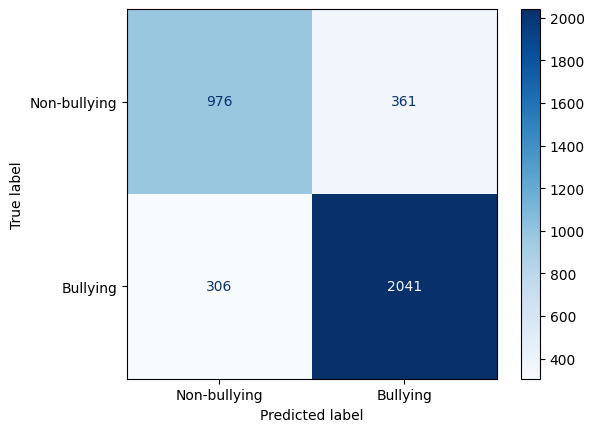

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

# Predict labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-bullying", "Bullying"])
disp.plot(cmap='Blues')


In [ ]:
print(accuracy_score(y_test,y_pred))

0.8189467969598263
